In [ ]:
# bfs/dfs
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    visited.add(start)

    while queue:
        vertex = queue.popleft()
        print(vertex, end=" ")

        for neighbor in graph[vertex]:
            if neighbor not in visited:
                queue.append(neighbor)
                visited.add(neighbor)

visited = set()

def dfs(visited, graph, node):
    if node not in visited:
        print (node, end=" ")
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)


graph = {
    1: [2, 3, 4],
    2: [5, 6],
    3: [7],
    4: [8],
    5: [9, 10],
    6: [],
    7: [],
    8: [],
    9: [],
    10: [11],
    11: [12],
    12: []
}

print("BFS Traversal:")
bfs(graph, 1)
print("\nDFS Traversal:")
dfs(visited,graph, 1)



BFS Traversal:
1 2 3 4 5 6 7 8 9 10 11 12 
DFS Traversal:
1 2 5 9 10 11 12 6 3 7 4 8 

In [ ]:


# floyd warshall

def floyd_warshall(G):
    distance = G.copy()
    for k in range(vertices):
        for i in range(vertices):
            for j in range(vertices):
                distance[i][j] = min(distance[i][j], distance[i][k] + distance[k][j])
    for i in range(vertices):
        for j in range(vertices):
            if(distance[i][j] == INF):
                print("INF", end=" ")
            else:
                print(distance[i][j], end="  ")
        print(" ")


INF = 999

G = [
    [0, 5, INF, 10],
    [INF, 0, 3, INF],
    [INF, INF, 0,   1],
    [INF, INF, INF, 0]
    ]

vertices=len(G)
floyd_warshall(G)


0  5  8  9   
INF 0  3  4   
INF INF 0  1   
INF INF INF 0   


In [ ]:
# maze problem
import heapq

class Maze:
    def __init__(self, grid):
        self.grid = grid
        self.rows = len(grid)
        self.cols = len(grid[0])

    def is_valid(self, row, col):
        return 0 <= row < self.rows and 0 <= col < self.cols and self.grid[row][col] == 0

    def get_neighbors(self, row, col, allow_diagonal=False):
        neighbors = []
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]

        if allow_diagonal:
            directions += [(1, 1), (-1, 1), (1, -1), (-1, -1)]

        for dr, dc in directions:
            new_row, new_col = row + dr, col + dc
            if self.is_valid(new_row, new_col):
                neighbors.append((new_row, new_col))
        return neighbors

    def manhattan_distance(self, current, goal):
        return abs(current[0] - goal[0]) + abs(current[1] - goal[1])

    def euclidean_distance(self, current, goal):
        return ((current[0] - goal[0]) ** 2 + (current[1] - goal[1]) ** 2) ** 0.5

    def find_path(self, start, goal, heuristic, allow_diagonal=False):
        open_set = []
        heapq.heappush(open_set, (0, start))
        came_from = {}
        g_scores = {start: 0}
        f_scores = {start: heuristic(start, goal)}

        while open_set:
            current_f, current = heapq.heappop(open_set)

            if current == goal:
                path = []
                while current in came_from:
                    path.append(current)
                    current = came_from[current]
                path.append(start)
                return path[::-1]

            for neighbor in self.get_neighbors(current[0], current[1], allow_diagonal):
                neighbor_g = g_scores[current] + self.get_cost(current, neighbor)

                if neighbor not in g_scores or neighbor_g < g_scores[neighbor]:
                    came_from[neighbor] = current
                    g_scores[neighbor] = neighbor_g
                    f_scores[neighbor] = neighbor_g + heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f_scores[neighbor], neighbor))

        return None

    def get_cost(self, current, neighbor):
        dx = abs(current[0] - neighbor[0])
        dy = abs(current[1] - neighbor[1])
        return dx + dy if dx == 1 or dy == 1 else 1.41

maze_grid = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0]
]
maze = Maze(maze_grid)
start = (0, 0)
goal = (4, 4)


manhattan_path = maze.find_path(start, goal, maze.manhattan_distance)
print("Manhattan Distance Path:", manhattan_path)

euclidean_path = maze.find_path(start, goal, maze.euclidean_distance, allow_diagonal=True)
print("Euclidean Distance Path:", euclidean_path)


Manhattan Distance Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]
Euclidean Distance Path: [(0, 0), (1, 0), (2, 1), (2, 2), (3, 3), (4, 4)]


In [ ]:
# pso
import random
import math

def function(x, y):
    return x**2 + y**2 + 2*x*y

def pso(objective_function, num_particles, num_dimensions, num_iterations):
    particles = []
    global_best_position = [0] * num_dimensions
    global_best_fitness = float('inf')

    for _ in range(num_particles):
        position = [random.uniform(-3, 3) for _ in range(num_dimensions)]
        velocity = [random.uniform(-1, 1) for _ in range(num_dimensions)]
        best_position = position
        best_fitness = objective_function(*position)

        particles.append((position, velocity, best_position, best_fitness))

        if best_fitness < global_best_fitness:
            global_best_fitness = best_fitness
            global_best_position = position
    print("positions")
    for particle in particles:
      position, velocity, best_position, best_fitness = particle
      print(position)
    print("velocity")
    for particle in particles:
      position, velocity, best_position, best_fitness = particle
      print(velocity)


    for _ in range(num_iterations):
        for particle in particles:
            position, velocity, best_position, best_fitness = particle

            for i in range(num_dimensions):
                r1 = random.random()
                r2 = random.random()

                cognitive_component = 2.0 * r1 * (best_position[i] - position[i])
                social_component = 2.0 * r2 * (global_best_position[i] - position[i])
                velocity[i] += cognitive_component + social_component
                position[i] += velocity[i]

            fitness = objective_function(*position)

            if fitness < best_fitness:
                best_fitness = fitness
                best_position = position

            if fitness < global_best_fitness:
                global_best_fitness = fitness
                global_best_position = position

            particle = (position, velocity, best_position, best_fitness)
        print(f"iteration {_} \n gbestposition: {global_best_position} \n gbestfitness: {global_best_fitness} \n")
    return global_best_position, global_best_fitness

best_position, best_fitness = pso(function, num_particles=5, num_dimensions=2, num_iterations=10)

print("Best position:", best_position)
print("Best fitness:", best_fitness)


positions
[0.9886996544291371, 0.39931214995446185]
[1.8583111542789812, 1.9857208836359233]
[2.7518025181638315, -1.3630231926928333]
[-2.9105723627313975, -1.5722449069551871]
[-0.5791194373738158, -1.1145248819423483]
velocity
[-0.13768652701992612, 0.24098260155037]
[-0.6704375820884503, 0.40845992729872393]
[0.540891398559467, -0.773239231667034]
[-0.5826521322146752, 0.7067538630519166]
[0.894043310223054, 0.6334711835406452]
iteration 0 
 gbestposition: [0.05718706444708199, 0.19280283333125925] 
 gbestfitness: 0.0624949489912255 

iteration 1 
 gbestposition: [-0.5996512639433431, 0.5593725492237289] 
 gbestfitness: 0.0016223748594641485 

iteration 2 
 gbestposition: [-2.050315655295897, 0.478450346942626] 
 gbestfitness: 0.0016223748594641485 

iteration 3 
 gbestposition: [-3.500980046648451, 0.3975281446615231] 
 gbestfitness: 0.0016223748594641485 

iteration 4 
 gbestposition: [-4.951644438001005, 0.31660594238042017] 
 gbestfitness: 0.0016223748594641485 

iteration 5 
 

In [ ]:
# 8 puzzle problem
import copy
from heapq import heappush, heappop
n = 3
row = [ 1, 0, -1, 0 ]
col = [ 0, -1, 0, 1 ]
def isSolvable(mat):
    lst = []
    for i in range(n):
        for j in range(n):
            lst.append(mat[i][j])
    inv_count = 0
    for i in range(n*n - 1):
        for j in range(i + 1, n*n):
            if lst[j] and lst[i] and lst[i] > lst[j]:
                inv_count += 1
    if inv_count % 2 == 0:
        return True
    else:
        return False

class priorityQueue:
    def __init__(self):
        self.heap = []
    def push(self, k):
        heappush(self.heap, k)
    def pop(self):
        return heappop(self.heap)
    def empty(self):
        if not self.heap:
            return True
        else:
            return False
class node:
    def __init__(self, parent, mat, empty_tile_pos,cost, level):
        self.parent = parent
        self.mat = mat
        self.empty_tile_pos = empty_tile_pos
        self.cost = cost
        self.level = level
    def __lt__(self, nxt):
        return self.cost < nxt.cost

def calculateCost(mat, final) -> int:
    count = 0
    for i in range(n):
        for j in range(n):
            if ((mat[i][j]) and
                (mat[i][j] != final[i][j])):
                count += 1
    return count

def newNode(mat, empty_tile_pos, new_empty_tile_pos,level, parent, final) -> node:
    new_mat = copy.deepcopy(mat)
    x1 = empty_tile_pos[0]
    y1 = empty_tile_pos[1]
    x2 = new_empty_tile_pos[0]
    y2 = new_empty_tile_pos[1]
    new_mat[x1][y1], new_mat[x2][y2] = new_mat[x2][y2], new_mat[x1][y1]


    cost = calculateCost(new_mat, final)
    new_node = node(parent, new_mat, new_empty_tile_pos,cost, level)
    return new_node

def printMatrix(mat):
    for i in range(n):
        for j in range(n):
            print("%d " % (mat[i][j]), end = " ")
        print()

def isSafe(x, y):
    return x >= 0 and x < n and y >= 0 and y < n

def printPath(root):
    if root == None:
        return
    printPath(root.parent)
    printMatrix(root.mat)
    print()

def solve(initial, empty_tile_pos, final):
    pq = priorityQueue()
    cost = calculateCost(initial, final)
    root = node(None, initial,empty_tile_pos, cost, 0)
    iterations=0;
    pq.push(root)
    while not pq.empty():
        iterations+=1;
        minimum = pq.pop()
        if minimum.cost == 0:
            print('No of iterations ',iterations)
            printPath(minimum)
            return
        for i in range(4):
            new_tile_pos = [
                minimum.empty_tile_pos[0] + row[i],
                minimum.empty_tile_pos[1] + col[i], ]
            if isSafe(new_tile_pos[0], new_tile_pos[1]):
                child = newNode(minimum.mat,
                                minimum.empty_tile_pos,
                                new_tile_pos,
                                minimum.level + 1,
                                minimum, final,)
                pq.push(child)

initial = [ [ 0, 1, 3 ],
            [ 4, 2 ,5 ],
            [ 7, 8, 6] ]

final = [ [ 1, 2, 3 ],
        [ 4, 5, 6 ],
        [ 7, 8 ,0 ] ]
empty_tile_pos = [ 0, 0 ]
print(isSolvable(initial))
solve(initial, empty_tile_pos, final)



True
No of iterations  5
0  1  3  
4  2  5  
7  8  6  

1  0  3  
4  2  5  
7  8  6  

1  2  3  
4  0  5  
7  8  6  

1  2  3  
4  5  0  
7  8  6  

1  2  3  
4  5  6  
7  8  0  



In [ ]:
# AND or Graph
def Cost(H, condition, weight = 1):
    cost = {}
    if 'AND' in condition:
        AND_nodes = condition['AND']
        Path_A = ' AND '.join(AND_nodes)
        PathA = sum(H[node]+weight for node in AND_nodes)
        cost[Path_A] = PathA

    if 'OR' in condition:
        OR_nodes = condition['OR']
        Path_B =' OR '.join(OR_nodes)
        PathB = min(H[node]+weight for node in OR_nodes)
        cost[Path_B] = PathB
    return cost

def update_cost(H, Conditions, weight=1):
    Main_nodes = list(Conditions.keys())
    Main_nodes.reverse()
    least_cost= {}
    for key in Main_nodes:
        condition = Conditions[key]
        print(key,':', Conditions[key],'>>>', Cost(H, condition, weight))
        c = Cost(H, condition, weight)
        H[key] = min(c.values())
        least_cost[key] = Cost(H, condition, weight)
    return least_cost


def shortest_path(Start,Updated_cost, H):
    Path = Start
    if Start in Updated_cost.keys():
        Min_cost = min(Updated_cost[Start].values())
        key = list(Updated_cost[Start].keys())
        values = list(Updated_cost[Start].values())
        Index = values.index(Min_cost)

        Next = key[Index].split()

        if len(Next) == 1:

            Start =Next[0]
            Path += '<--' +shortest_path(Start, Updated_cost, H)

        else:
            Path +='<--('+key[Index]+') '

            Start = Next[0]
            Path += '[' +shortest_path(Start, Updated_cost, H) + ' + '

            Start = Next[-1]
            Path += shortest_path(Start, Updated_cost, H) + ']'

    return Path

H = {'A': -1, 'B': 3, 'C': 2, 'D': 4, 'E': 6, 'F': 9, 'G': 3, 'H': 0, 'I': 0, 'J': 0, 'K': 1, 'L': 2}

Conditions = {
    'A': {'OR': ['B'], 'AND': ['C', 'D']},
    'B': {'OR': ['E', 'F']},
    'C': {'OR': ['G'], 'AND': ['H', 'I']},
    'D': {'OR': ['J', 'K']},
    'E': {'AND': ['L']}
}

weight = 1
print('Updated Cost :')
Updated_cost = update_cost(H, Conditions, weight=1)

print('Shortest Path :\n',shortest_path('A', Updated_cost,H))



Updated Cost :
E : {'AND': ['L']} >>> {'L': 3}
D : {'OR': ['J', 'K']} >>> {'J OR K': 1}
C : {'OR': ['G'], 'AND': ['H', 'I']} >>> {'H AND I': 2, 'G': 4}
B : {'OR': ['E', 'F']} >>> {'E OR F': 4}
A : {'OR': ['B'], 'AND': ['C', 'D']} >>> {'C AND D': 5, 'B': 5}
Shortest Path :
 A<--(C AND D) [C<--(H AND I) [H + I] + D<--(J OR K) [J + K]]


In [ ]:
# N queen
def constraints(board, row, col):

    for i in range(row):
        if board[i] == col:
            return False

    i = row - 1
    j = col - 1
    while i >= 0 and j >= 0:
        if board[i] == j:
            return False
        i -= 1
        j -= 1

    i = row - 1
    j = col + 1
    while i >= 0 and j < 8:
        if board[i] == j:
            return False
        i -= 1
        j += 1

    return True

def solve_queens(board, row):
    if row == 8:
        return True

    for col in range(8):
        if constraints(board, row, col):
            board[row] = col
            if solve_queens(board, row + 1):
                return True
            board[row] = -1

    return False

def print_solution(board, domain):
    for i in domain:
        print("Queen", i, "is placed in column", board[i - 1]+1)

board = [-1] * 8
domain = [1, 2, 3, 4, 5, 6, 7, 8]

if solve_queens(board, 0):
    print("Solution:")
    print_solution(board, domain)
else:
    print("No solution exists.")


Solution:
Queen 1 is placed in column 1
Queen 2 is placed in column 5
Queen 3 is placed in column 8
Queen 4 is placed in column 6
Queen 5 is placed in column 3
Queen 6 is placed in column 7
Queen 7 is placed in column 2
Queen 8 is placed in column 4


In [ ]:
# tsp
import heapq
def tsp_best_first(graph, start):
    def nearest_neighbor(current_node, remaining_nodes):
        return min(remaining_nodes, key=lambda x: graph[current_node][x])

    priority_queue = []
    heapq.heappush(priority_queue, (0, [start]))

    while priority_queue:
        cost, path = heapq.heappop(priority_queue)
        current_node = path[-1]

        if len(path) == len(graph):
            return path, cost

        remaining_nodes = set(graph.keys()) - set(path)

        for node in remaining_nodes:
            new_cost = cost + graph[current_node][node]
            new_path = path + [node]
            heapq.heappush(priority_queue, (new_cost, new_path))

    return None


graph = {
    'A': {'B': 2, 'C': 1, 'D': 3},
    'B': {'A': 2, 'C': 4, 'D': 2},
    'C': {'A': 1, 'B': 4, 'D': 2},
    'D': {'A': 3, 'B': 2, 'C': 2}
}
start_node = 'A'

path, cost = tsp_best_first(graph, start_node)

if path:
    print("Optimal Path:", ' -> '.join(path))
    print("Total Cost:", cost)
else:
    print("No solution found.")


Optimal Path: A -> C -> D -> B
Total Cost: 5


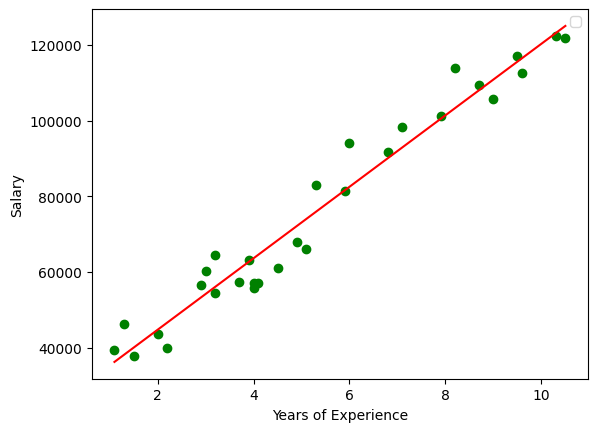

Intercept: 25792.200198668696
Coefficient: [9449.96232146]
Predictions: [129741.78573467 139191.74805613  75877.00050238]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
X = np.array([1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7, 3.9, 4.0,
              4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0, 6.8, 7.1, 7.9, 8.2,
              8.7, 9.0, 9.5, 9.6, 10.3, 10.5]).reshape(-1, 1)
y = np.array([39343.00, 46205.00, 37731.00, 43525.00, 39891.00, 56642.00,
              60150.00, 54445.00, 64445.00, 57189.00, 63218.00, 55794.00,
              56957.00, 57081.00, 61111.00, 67938.00, 66029.00, 83088.00,
              81363.00, 93940.00, 91738.00, 98273.00, 101302.00, 113812.00,
              109431.00, 105582.00, 116969.00, 112635.00, 122391.00, 121872.00])

model = LinearRegression()
model.fit(X, y)



slope = model.coef_[0]
intercept = model.intercept_
y_model = slope * X + intercept
plt.scatter(X, y, color='green')
plt.plot(X, y_model, color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

X_new = np.array([[11.0], [12.0],[5.3]])
y_pred = model.predict(X_new)
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)
print("Predictions:", y_pred)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coefficients(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n * mean_y * mean_x
    SS_xx = np.sum(x*x) - n * mean_x * mean_x

    # calculating regression coefficients
    slope = SS_xy / SS_xx
    intercept = mean_y - slope * mean_x

    return (intercept, slope)

def plot_regression_line(x, y, coefficients):
    # plotting the actual points as a scatter plot
    plt.scatter(x, y, color="m", marker="o", s=30)

    # predicted response vector
    y_pred = coefficients[0] + coefficients[1] * x

    # plotting the regression line
    plt.plot(x, y_pred, color="g")

    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')

    # function to show plot
    plt.show()

def main():
    # observations/data
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

    # estimating coefficients
    coefficients = estimate_coefficients(x, y)
    print("Estimated coefficients:\nintercept = {}\nslope = {}".format(coefficients[0], coefficients[1]))

    # plotting regression line
    plot_regression_line(x, y, coefficients)

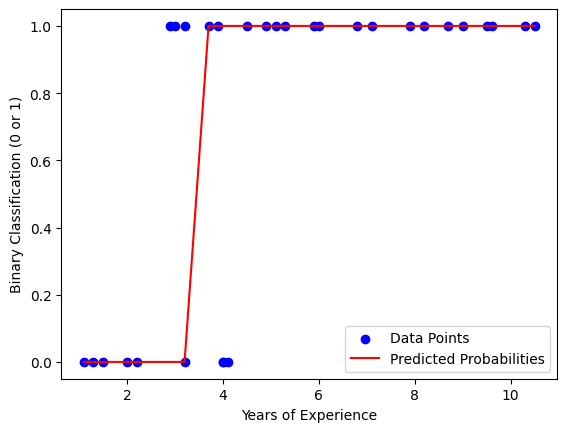

Intercept: [-3.56086458]
Coefficient: [[1.07328679]]
Predictions: [1 1 1]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X = np.array([1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7, 3.9, 4.0,
              4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0, 6.8, 7.1, 7.9, 8.2,
              8.7, 9.0, 9.5, 9.6, 10.3, 10.5]).reshape(-1, 1)
y_binary = np.array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                     1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

model = LogisticRegression()
model.fit(X, y_binary)

predicted_values = model.predict(X)

plt.scatter(X, y_binary, color='blue', label='Data Points')
plt.plot(X, predicted_values, color='red', label='Predicted Probabilities')
plt.xlabel('Years of Experience')
plt.ylabel('Binary Classification (0 or 1)')
plt.legend()
plt.show()

X_new = np.array([[11.0], [12.0], [5.3]])
y_pred = model.predict(X_new)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)
print("Predictions:", y_pred)


In [ ]:
y_prob = model.predict_proba(X)[:, 1]
y_prob

array([0.08469125, 0.1028832 , 0.12445151, 0.19555813, 0.2315404 ,
       0.38975721, 0.41556556, 0.46845524, 0.46845524, 0.60115898,
       0.65134439, 0.67530597, 0.67530597, 0.69838333, 0.78055883,
       0.84530482, 0.87134438, 0.89355271, 0.94111769, 0.94679127,
       0.97674   , 0.98303465, 0.99274009, 0.99472814, 0.99691074,
       0.99775928, 0.99868862, 0.99882192, 0.99944389, 0.99955127])

In [ ]:
y_prob

array([[9.15308747e-01, 8.46912530e-02],
       [8.97116805e-01, 1.02883195e-01],
       [8.75548493e-01, 1.24451507e-01],
       [8.04441866e-01, 1.95558134e-01],
       [7.68459605e-01, 2.31540395e-01],
       [6.10242792e-01, 3.89757208e-01],
       [5.84434439e-01, 4.15565561e-01],
       [5.31544763e-01, 4.68455237e-01],
       [5.31544763e-01, 4.68455237e-01],
       [3.98841021e-01, 6.01158979e-01],
       [3.48655607e-01, 6.51344393e-01],
       [3.24694034e-01, 6.75305966e-01],
       [3.24694034e-01, 6.75305966e-01],
       [3.01616666e-01, 6.98383334e-01],
       [2.19441165e-01, 7.80558835e-01],
       [1.54695183e-01, 8.45304817e-01],
       [1.28655623e-01, 8.71344377e-01],
       [1.06447290e-01, 8.93552710e-01],
       [5.88823119e-02, 9.41117688e-01],
       [5.32087319e-02, 9.46791268e-01],
       [2.32599950e-02, 9.76740005e-01],
       [1.69653456e-02, 9.83034654e-01],
       [7.25991306e-03, 9.92740087e-01],
       [5.27185562e-03, 9.94728144e-01],
       [3.089257